In [2]:
import re
import json
import requests
import pandas as pd


def get_cmt_from_shopee_url(url):

    r = re.search(r"i\.(\d+)\.(\d+)", url)
    shop_id, item_id = r[1], r[2]
    ratings_url = "https://shopee.vn/api/v2/item/get_ratings?filter=0&flag=1&itemid={item_id}&limit=50&offset={offset}&shopid={shop_id}&type={rating}"

    # d = {"username": [], "rating": [], "comment": []}
    d = {"comment": [], "rating": []}

    for rate in range(1, 6):
        offset = 0
        while True:
            try:
              data = requests.get(ratings_url.format(shop_id=shop_id, item_id=item_id, offset=offset, rating = rate)).json()

              i = 1
              for i, rating in enumerate(data["data"]["ratings"], 1):
                  d["rating"].append(rating["rating_star"])
                  d["comment"].append(rating["comment"])

                  # print(rating["rating_star"])
                  # print(rating["comment"])
                  # print("-" * 100)

              offset += 50
            except TypeError:
              break
    return d

In [3]:
url1 = "https://shopee.vn/S%E1%BB%AFa-r%E1%BB%ADa-m%E1%BA%B7t-Simple-l%C3%A0nh-t%C3%ADnh-s%E1%BA%A1ch-tho%C3%A1ng-cho-da-nh%E1%BA%A1y-c%E1%BA%A3m-150ml-CH%C3%8DNH-H%C3%83NG-%C4%90%E1%BB%98C-QUY%E1%BB%80N-DI%E1%BB%86N-M%E1%BA%A0O-M%E1%BB%9AI--i.111138057.8587034871"

In [4]:
df1 = pd.DataFrame(get_cmt_from_shopee_url(url1))

In [5]:
df1

,comment,rating
0,Công dụng:rỬa mặt\nMùi hương:ổn\nKết cấu:gel\n...,1
1,Công dụng:sữa rửa mặt\nMùi hương:chưa biết\nDà...,1
2,Dành cho da:lhuf hợp với mọi loại da\nCông dụn...,1
3,Công dụng:Rửa mặt\nMùi hương:Gần như không có\...,1
4,Công dụng:làm sạch\nMùi hương:không biết\nDành...,1
...,...,...
11147,Công dụng:làm sạch\nMùi hương:không có\nDành c...,5
11148,Ốp đẹp giao hàng nhanh sẽ ủng hộ shop dàiiiiii...,5
11149,Công dụng:sữa rửa mặt\nMùi hương:chầc hong mùi...,5
11150,Mùi hương:có mùi nhưng kiểu như không mùi í\nP...,5


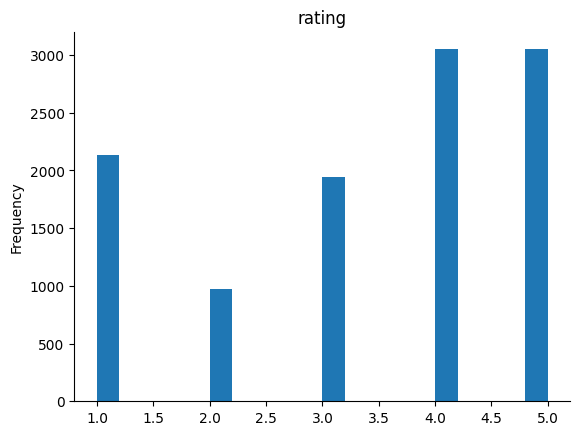

In [6]:
# @title rating

from matplotlib import pyplot as plt
df1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df = df1
len(df)

11152

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/shopee_data.csv", index=False)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11152 entries, 0 to 11151
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  11152 non-null  object
 1   rating   11152 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 174.4+ KB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#**Xử lý dữ liệu**

In [12]:
! pip install underthesea==6.6.0
! pip install stop-words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=79732f346199e7b25ebf063d9070b978af1f6d147fd67d5751b15c165fca62ee
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


[link text](https://)## Chuẩn hóa dữ liệu, tách từ

In [13]:
from underthesea import sent_tokenize
from underthesea import text_normalize
from underthesea import word_tokenize

In [14]:
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer

stop_words = get_stop_words('vi')

def remove_vietnamese_stopwords(words):
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

def assign_label(rating):
  new_class = "neutral"
  if rating>=4:
    new_class = "positive"
  elif rating<=2:
    new_class = "negative"
  return new_class

In [15]:
tokenizer = RegexpTokenizer(r'\w+')
df['words'] = df['comment'].apply(tokenizer.tokenize)
df['words'] = df['words'].apply(remove_vietnamese_stopwords)
df['label'] = df['rating'].apply(assign_label)
df.head(5)

,comment,rating,words,label
0,Công dụng:rỬa mặt\nMùi hương:ổn\nKết cấu:gel\n...,1,Công dụng rỬa mặt Mùi hương ổn Kết cấu gel sho...,negative
1,Công dụng:sữa rửa mặt\nMùi hương:chưa biết\nDà...,1,Công dụng sữa rửa mặt Mùi hương da bình chất v...,negative
2,Dành cho da:lhuf hợp với mọi loại da\nCông dụn...,1,da lhuf hợp da Công dụng sạch da Mùi hương mùi...,negative
3,Công dụng:Rửa mặt\nMùi hương:Gần như không có\...,1,Công dụng Rửa mặt Mùi hương da da Shipper gọi ...,negative
4,Công dụng:làm sạch\nMùi hương:không biết\nDành...,1,Công dụng sạch Mùi hương da tất flashs sale 1 ...,negative


positive    6100
negative    3110
neutral     1942
Name: label, dtype: int64


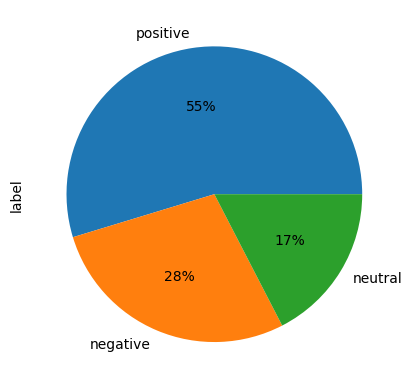

In [16]:
import matplotlib.pyplot as plt
countClass = pd.value_counts(df['label'], sort=True, dropna=False)
print(countClass)
countClass.plot(kind = "pie", autopct= '%1.0f%%')
plt.show()



```
# This is formatted as code
```

## Naive Bayes Algorithm

In [17]:
def create_word_features(clean_words):
    my_dict = dict([(word, True) for word in clean_words])
    return my_dict

df['feature'] = df['words'].apply(create_word_features)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Convert text data into bag-of-words features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['words'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = NB_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6172120125504258
              precision    recall  f1-score   support

    negative       0.58      0.51      0.54       626
     neutral       0.25      0.09      0.14       391
    positive       0.67      0.84      0.75      1214

    accuracy                           0.62      2231
   macro avg       0.50      0.48      0.47      2231
weighted avg       0.57      0.62      0.58      2231



In [19]:
print(y_test)

10520    positive
6613     positive
2174     negative
1744     negative
7978     positive
           ...   
3281      neutral
9922     positive
10383    positive
6098     positive
3290      neutral
Name: label, Length: 2231, dtype: object


Confusion matrix, without normalization
[[ 318   34  274]
 [ 121   37  233]
 [ 112   80 1022]]
Normalized confusion matrix
[[0.50798722 0.0543131  0.43769968]
 [0.30946292 0.09462916 0.59590793]
 [0.092257   0.06589786 0.84184514]]


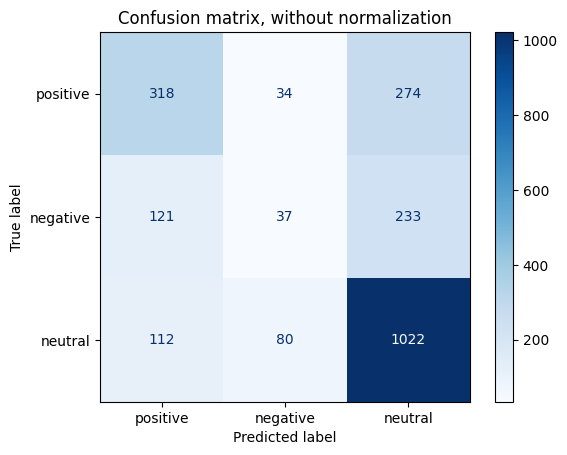

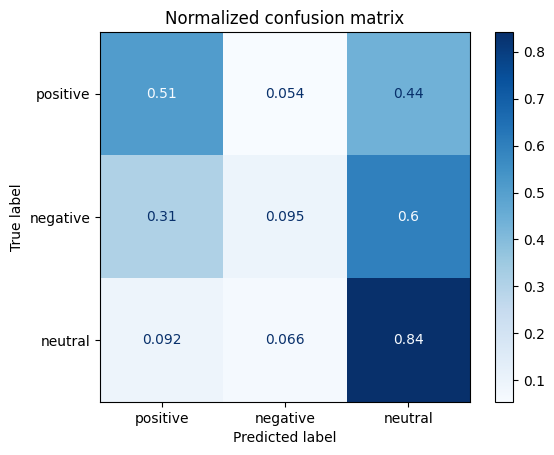

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        NB_model,
        X_test,
        y_test,
        display_labels=["positive", "negative", "neutral"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Support Vector Machine (SVM)

> Indented block



In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['words'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svc_model = SVC(kernel='linear')  # You can try different kernels like 'linear', 'rbf', etc.
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6608433734939759
              precision    recall  f1-score   support

    negative       0.57      0.42      0.49       335
     neutral       0.41      0.50      0.45       362
    positive       0.80      0.80      0.80       963

    accuracy                           0.66      1660
   macro avg       0.59      0.58      0.58      1660
weighted avg       0.67      0.66      0.66      1660



Confusion matrix, without normalization
[[142 119  74]
 [ 60 181 121]
 [ 47 142 774]]
Normalized confusion matrix
[[0.4238806  0.35522388 0.22089552]
 [0.16574586 0.5        0.33425414]
 [0.04880582 0.14745587 0.80373832]]


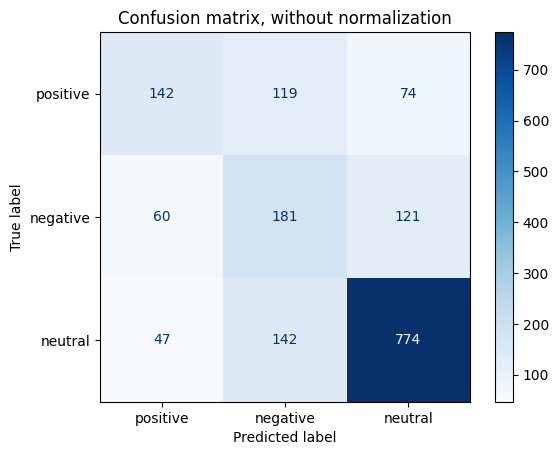

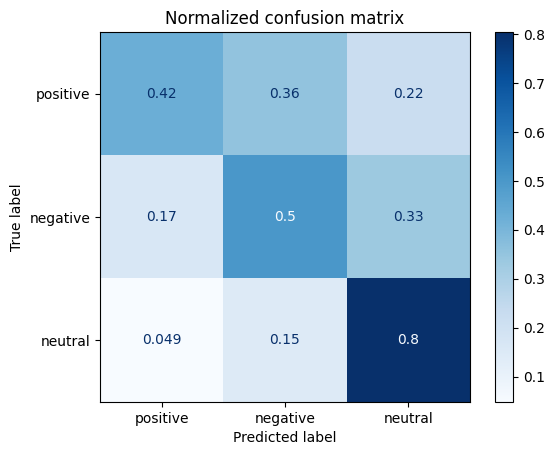

In [ ]:
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svc_model,
        X_test,
        y_test,
        display_labels=["positive", "negative", "neutral"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



```
# This is formatted as code
```

## Logistic Regression

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Check for and handle None values in the 'sentiment' column
df['label'].fillna('None', inplace=True)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["words"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df["label"], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6620481927710843
              precision    recall  f1-score   support

    negative       0.56      0.39      0.46       335
     neutral       0.42      0.46      0.44       362
    positive       0.78      0.83      0.80       963

    accuracy                           0.66      1660
   macro avg       0.59      0.56      0.57      1660
weighted avg       0.66      0.66      0.66      1660



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix, without normalization
[[132 113  90]
 [ 59 167 136]
 [ 45 118 800]]
Normalized confusion matrix
[[0.39402985 0.33731343 0.26865672]
 [0.16298343 0.46132597 0.37569061]
 [0.04672897 0.12253375 0.83073728]]


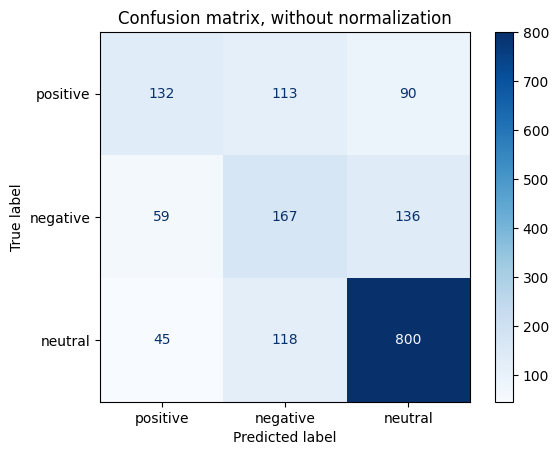

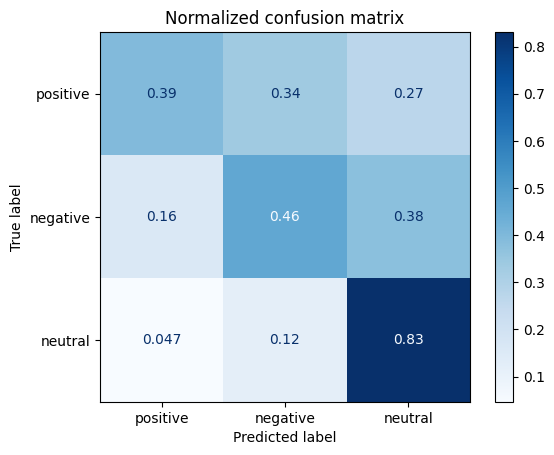

In [ ]:
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        logistic_regression_model,
        X_test,
        y_test,
        display_labels=["positive", "negative", "neutral"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Decision Tree

In [ ]:
# Import necessary libraries
from sklearn import tree

# Check for and handle None values in the 'sentiment' column
df['label'].fillna('None', inplace=True)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["words"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df["label"], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5951807228915663
              precision    recall  f1-score   support

    negative       0.45      0.33      0.38       335
     neutral       0.37      0.48      0.41       362
    positive       0.75      0.73      0.74       963

    accuracy                           0.60      1660
   macro avg       0.52      0.51      0.51      1660
weighted avg       0.60      0.60      0.60      1660



Confusion matrix, without normalization
[[111 120 104]
 [ 56 172 134]
 [ 79 179 705]]
Normalized confusion matrix
[[0.33134328 0.35820896 0.31044776]
 [0.15469613 0.47513812 0.37016575]
 [0.08203531 0.18587747 0.73208723]]


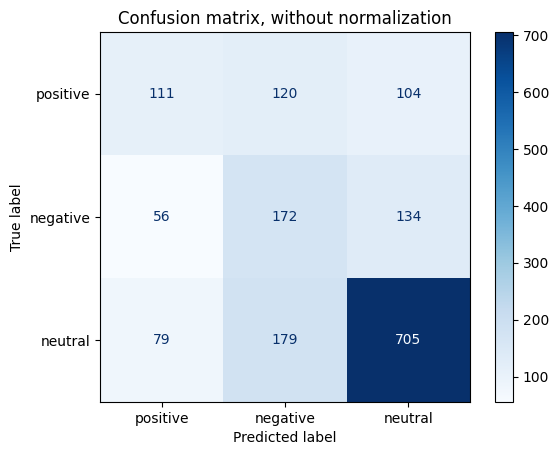

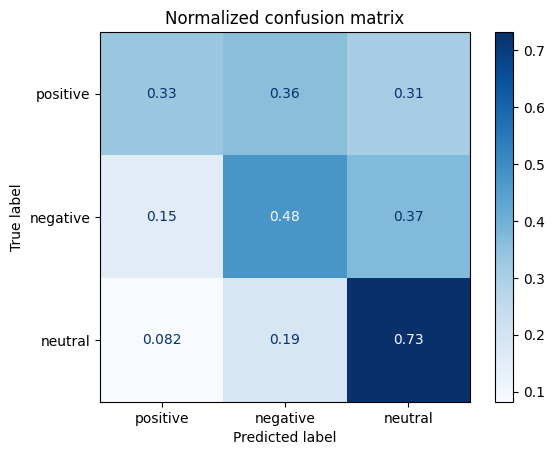

In [ ]:
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        decision_tree_model,
        X_test,
        y_test,
        display_labels=["positive", "negative", "neutral"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()